# Multiplexers #1

Multiplexers are considered the hardware version of an `if .. then .. else` construct by a programming language. Most traditional HDLs use this not so fortunate programming paradigm to finally infer to a multiplexer. This can get tricky.

## Chained multiplexers

In [1]:
from myhdl import *

@block
def async_mux(a, b, q):
    @always_comb
    def worker():
        if a[0]:
            q.next = 2
        elif b[0] == 1:
            q.next = 1
        else:
            q.next = 0
    return instances()

### Generate RTL

CREATE Module: 'test'
Adding module with name: async_mux_8_8_8
CONVERT_RTL tree >>>>>> 'TEST_WORKER' 
DONE instancing submodules
Generating RTL image...
Display...


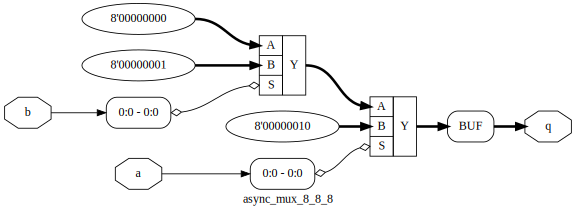

In [2]:
from ys_aux import to_svg
from myhdl.conversion import yshelper

a, b, c = [ Signal(intbv()[8:]) for i in range(3) ]

design = yshelper.Design("test")
inst = async_mux(a, b, c)
inst.convert("yosys_module", design, name="test", trace=True)

display(to_svg(design, "", 80))

This somewhat more complex logic chain explains as follows. We trace our way back from the `q` output:
1. The last `$mux` in the chain selects the value from input `A` when `S` is False, `B` when set. `S` is wired to the slice `a[0]`.
+  The second last `$mux` again selects likewise for `b[0]`
+  Thus, when `a[0]` not set and `b[0]` not set, the default value `0` is chosen for the output.


## Parallel multiplexers

When the decision to be made is dependent on only one input or state, a parallel multiplexer can be inferred.

In [3]:
from myhdl import *

@block
def async_pmux(a, b, q):
    @always_comb
    def worker():
        if a == 1:
            q.next = 2
        elif a == 2:
            q.next = 1
        else:
            q.next = 0
    return instances()

### Generate RTL

CREATE Module: 'test'
Adding module with name: async_pmux_8_8_8
CONVERT_RTL tree >>>>>> 'TEST_WORKER' 
DONE instancing submodules
Generating RTL image...
Display...


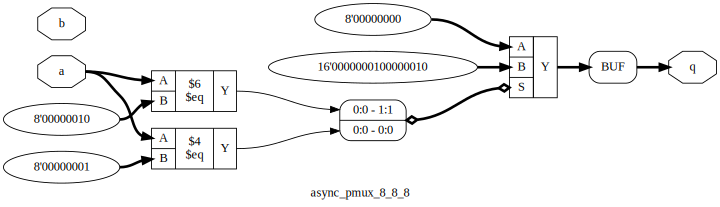

In [4]:
from ys_aux import to_svg
from myhdl.conversion import yshelper

a, b, c = [ Signal(intbv()[8:]) for i in range(3) ]

design = yshelper.Design("test")
inst = async_pmux(a, b, c)
inst.convert("yosys_module", design, name="test", trace=True)

display(to_svg(design))

Here you see only one `$pmux` element. It behaves as follows:

1. When one, and only one of its `S` input bits is set, choose the corresponding slice from the `B` bit array.
+  The slice is taken as follows: Be `i` the bit number set, `n` the number of bits for the output signal `Y`, then `Y <= B[n*(i+1):n*i]`
+  When none of the `S` bits is set, use the value from `A`
+  When more than one bits are set, behaviour is undefined!

## Exercises

1. Create a simulation for both multiplexer types that demonstrate that all cases are covered
   You can either use a waveform, better, a truth table. Study this [myhdlpeek example](/notebooks/external/myhdlpeek/examples/peeker_tables.ipynb)

To commit your results, uncomment the following (remove '#') and run:

In [5]:
! git add muxers.ipynb
#! git commit -m "Added multiplexer exercise"

When you're confident you're ready to hand in your result, uncomment and run:

In [6]:
#! git push